In [2]:
# Import libraries & dataframe (FC02 Monthly Values)

import numpy as np
import pandas as pd
import matplotlib as mlp
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

fco2 = pd.read_csv(r'C:\Users\mattd\OneDrive\Desktop\Monthly CO2 Flux Values.csv')

fco2.head()



,Year,FC Avg
0,2009-01,-0.0707
1,2009-02,0.0021
2,2009-03,-0.2487
3,2009-04,-0.5221
4,2009-05,-1.4441


In [3]:
import plotly.express as px

fig = px.bar(fco2, x='Year',
y='FC Avg', color='FC Avg')
fig.show()

Talk about negative values for fco2 monthly average estimates - carbon uptake (look into how to standardize negative values, scaling down range between -1and1).

In [4]:
# import new dataframe with all variables of interest for ML Regression Model - FCH4, FCO2, Soil Temp, ATM Temp, Precipitation

# Indicator variable = FCH4
# Predictor Variables = FCO2, Precipitation, Soil Temp, ATM Temp

monthly_var = pd.read_csv(r'C:\Users\mattd\OneDrive\Desktop\All_Monthly_Var_Data.csv', header=0)

monthly_var.head()

,Year,FCH4,FCO2,Precip,Soil_Temp,ATM_Temp
0,1990-01,NaN,NaN,0.1250,31.5968,18.2750
1,1990-02,NaN,NaN,0.0800,31.4690,12.8120
2,1990-03,NaN,NaN,0.1650,32.1080,28.4540
3,1990-04,NaN,NaN,0.2000,34.1960,40.8830
4,1990-05,NaN,NaN,0.0700,42.6704,50.8100


In [5]:
# examine nature of dataframe

monthly_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       384 non-null    object 
 1   FCH4       138 non-null    float64
 2   FCO2       156 non-null    float64
 3   Precip     360 non-null    float64
 4   Soil_Temp  360 non-null    float64
 5   ATM_Temp   360 non-null    float64
dtypes: float64(5), object(1)
memory usage: 18.1+ KB


In [6]:
# calculate missing values % contribution in DF

df_null = monthly_var.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

FCH4        64.0600
FCO2        59.3800
Precip      6.2500 
Soil_Temp   6.2500 
ATM_Temp    6.2500 
dtype: float64

In [7]:
df = monthly_var.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [8]:
df_null = df.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

Year        0.0000
FCH4        0.0000
FCO2        0.0000
Precip      0.0000
Soil_Temp   0.0000
dtype: float64

In [9]:
import rfpimp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [10]:
# Data Preparation

# Predictor Variables: FC02, Precip, Soil Temp, ATM Temp
# Response Variable: FCH4

features = ['FCH4', 'FCO2', 'Precip', 'Soil_Temp', 'ATM_Temp']

In [11]:
# Train/Test Split

df_train, df_test = train_test_split(df, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('FCH4',axis=1), df_train['FCH4']
X_test, y_test = df_test.drop('FCH4',axis=1), df_test['FCH4']

In [12]:
# Train using Random Forest

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [13]:
# Permutation Feature Importance

imp = rfpimp.importances(rf, X_test, y_test)

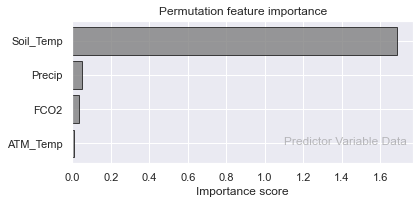

In [14]:
# Plot Permutation Importance

fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, 'Predictor Variable Data', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()

Discuss if necessary to include a permutation importance graph?

In [15]:
# Quantify correlation between variables
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,FCH4,FCO2,Precip,Soil_Temp,ATM_Temp
FCH4,1.000000,-0.735146,0.433535,0.873856,0.762159
FCO2,-0.735146,1.000000,-0.511046,-0.869557,-0.830535
Precip,0.433535,-0.511046,1.000000,0.574996,0.591479
Soil_Temp,0.873856,-0.869557,0.574996,1.000000,0.915810
ATM_Temp,0.762159,-0.830535,0.591479,0.915810,1.000000


Correlation Assessement between predictor variables and indicator variable (FCH4).

In order of magntitude:
1. Soil Temp (0.87)
2. ATM Temp (0.76)
3. FCO2 (-0.75)
4. Precip (0.43)

(114, 8)

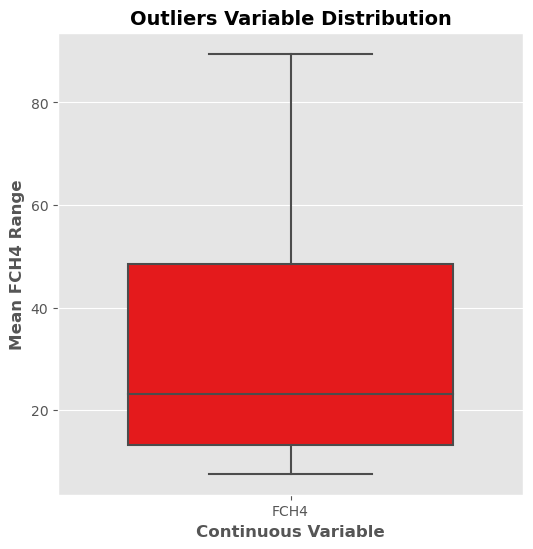

In [64]:
# Outlier analysis of target variable with max amount of Inconsistency

outliers = ['FCH4']
plt.rcParams['figure.figsize'] = [6,6]
sns.boxplot(data=df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Mean FCH4 Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df.shape

<AxesSubplot:title={'center':'FCH4 Distribution Plot'}, xlabel='FCH4', ylabel='Density'>

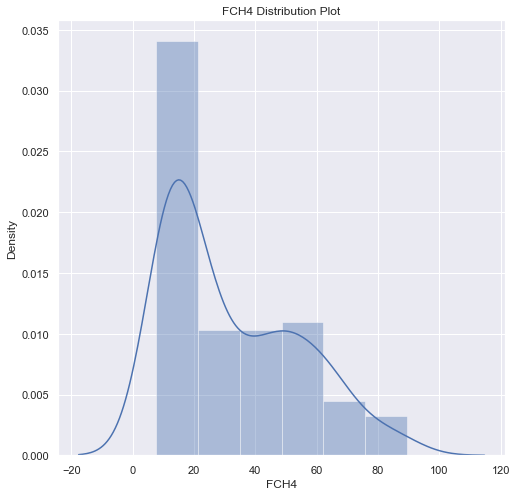

In [16]:
# Visualize spread of indicator variable (FCH4) data

plt.figure(figsize=(8,8))

plt.title('FCH4 Distribution Plot')
sns.distplot(df['FCH4'])


Raw distribution is not normally distributed - heavy left-skewed.

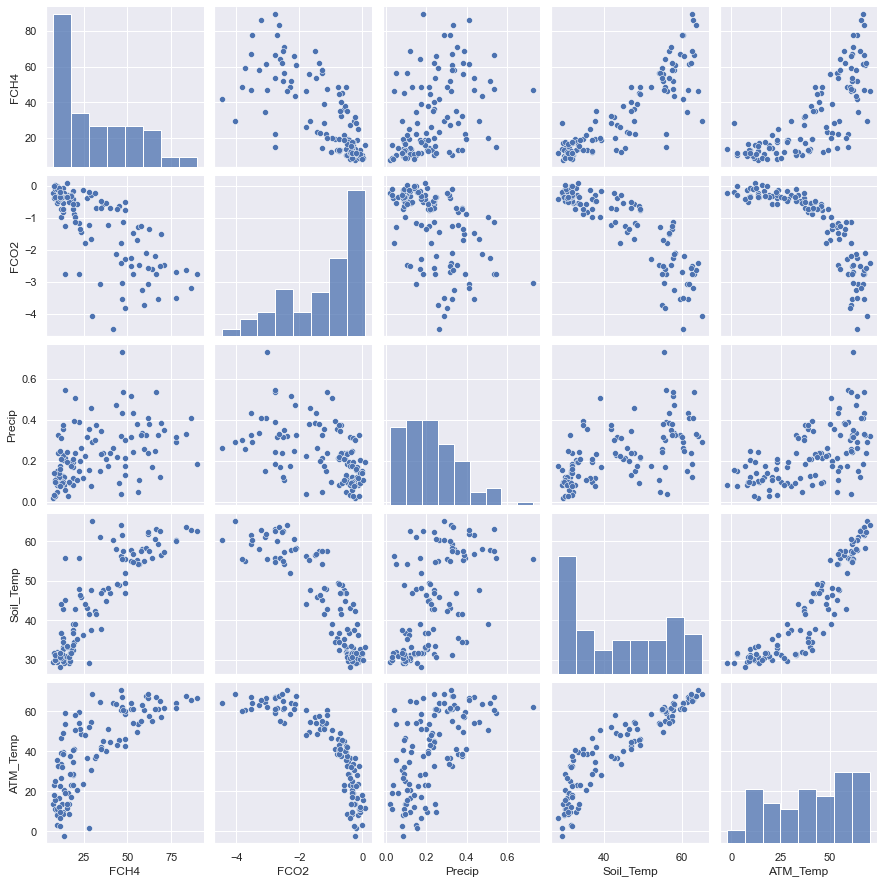

In [17]:
# Mass Scatterplot Visualizing Numeric Variables

ax = sns.pairplot(df[['FCH4', 'FCO2', 'Precip', 'Soil_Temp', 'ATM_Temp']])

Relationship between FCH4 & FCO2 may be inverses?

In [18]:
# Create a df of ALL predictor variables

col = ['FCO2', 'Precip', 'Soil_Temp', 'ATM_Temp']

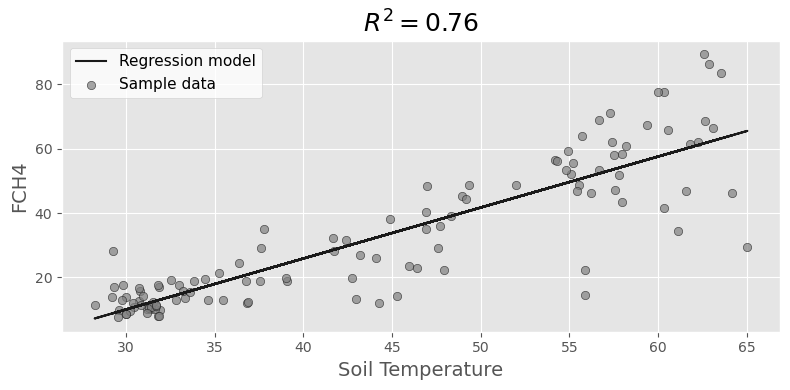

In [19]:
# Build simple linear regression model using most influential variable first (Soil Temp)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# Data Prep

X = df['Soil_Temp'].values.reshape(-1,1)
y = df['FCH4'].values

# Training

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

# Evaluate


r2 = model.score(X, y)

# Plot Model

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('FCH4', fontsize=14)
ax.set_xlabel('Soil Temperature', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

Simple linear regression - relationship between FCH4 & Soil Temp (F) --> clean up the legends for this graph (include units of measurements)

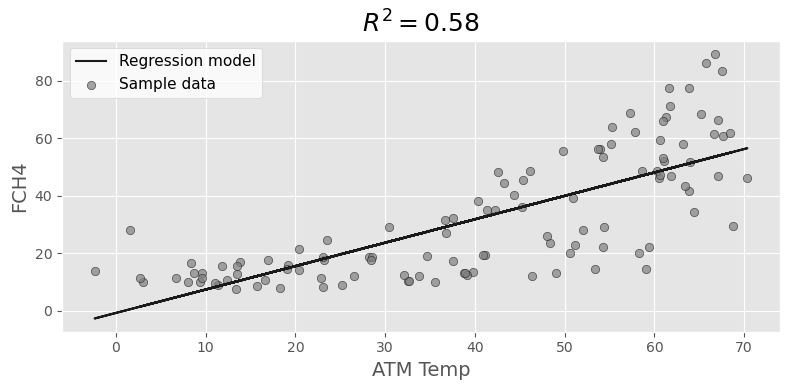

In [20]:
# Build Simple linear regression model using next influential variable (ATM Temp)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# Data Prep

X = df['ATM_Temp'].values.reshape(-1,1)
y = df['FCH4'].values

# Training

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

# Evaluate


r2 = model.score(X, y)

# Plot Model

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('FCH4', fontsize=14)
ax.set_xlabel('ATM Temp', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

In [21]:
# Create a df for ALL signifcant variables to throw into model
sig_col = ['FCH4', 'FCO2', 'Soil_Temp', 'ATM_Temp', 'Precip']

In [22]:
# Create a new dataframe using the signficant variables so we can prep for training/testing sets

df_auto = df[sig_col]

In [23]:
# examine newly created dataframe with signficant variables

df_auto

,FCH4,FCO2,Soil_Temp,ATM_Temp,Precip
231,13.4700,-0.5221,33.3362,39.8300,0.1250
232,23.4400,-1.4441,45.9725,48.4070,0.2650
233,48.6300,-2.2784,52.0175,58.5770,0.1750
234,59.3000,-3.7182,54.9024,60.6020,0.2600
235,67.3100,-3.5193,59.4050,61.2950,0.3250
...,...,...,...,...,...
355,65.9300,-2.1809,60.5600,60.9440,0.2500
356,53.4800,-1.4709,56.6825,54.3020,0.4350
357,35.0600,-0.6948,46.8860,41.3330,0.3450
358,18.8300,-0.5621,33.8000,23.0630,0.2100


In [24]:
# Split the data intro training and testing sets (Divide DF into 70/30 Ratio)

np.random.seed(0)
df_train, df_test = train_test_split(df_auto, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
# Examine training dataset

df_train.head()

,FCH4,FCO2,Soil_Temp,ATM_Temp,Precip
251,13.0400,-0.0656,32.8040,9.6440,0.2050
322,31.6500,-0.2344,42.3980,36.6800,0.3000
237,27.0200,-0.3771,43.1750,36.7880,0.3150
234,59.3000,-3.7182,54.9024,60.6020,0.2600
243,12.0400,-0.9827,36.8000,46.4000,0.0950


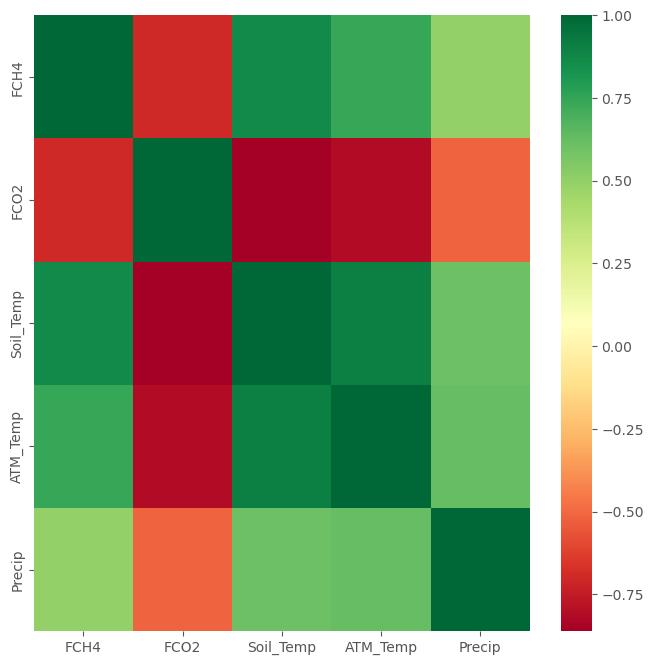

In [26]:
# check correlation coefficients

plt.figure(figsize = (8, 8))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

In [27]:
# Dividing into X (the predictor variables) and Y (FCH4) sets for the model building

y_train = df_train.pop('FCH4')
X_train = df_train

In [28]:
# Building linear model with FCH4 & Soil Temp

X_train_1 = X_train['Soil_Temp']

In [29]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [30]:
# Check parameters created

lr_1.params

const       -37.1362
Soil_Temp   1.5832  
dtype: float64

In [31]:
# summary of linear regression between FCH4 & Soil Temp

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   FCH4   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     230.9
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           6.99e-25
Time:                        09:54:41   Log-Likelihood:                -299.63
No. Observations:                  79   AIC:                             603.3
Df Residuals:                      77   BIC:                             608.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.1362      4.735     -7.842      0.0

Results of OLS between FCH4 & FCO2

In [32]:
# Building linear model with FCH4 & ATM Temp

X_train_2 = X_train['ATM_Temp']

In [33]:
# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [34]:
# Check parameters created

lr_2.params

const      0.8683
ATM_Temp   0.7880
dtype: float64

In [35]:
# summary of linear regression between FCH4 & ATM Temp

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   FCH4   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     95.94
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           3.56e-15
Time:                        09:54:49   Log-Likelihood:                -322.41
No. Observations:                  79   AIC:                             648.8
Df Residuals:                      77   BIC:                             653.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8683      3.607      0.241      0.8

Results of FCH4 & ATM Temp

In [37]:
# Build Simple Linear Regression Model with FCH4 & FCO2

X_train_3 = X_train['FCO2']

In [38]:
# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()

In [39]:
# Check parameters created

lr_3.params

const   16.6052 
FCO2    -13.1149
dtype: float64

In [40]:
# summary of linear regression between FCH4 & FCO2

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   FCH4   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     76.41
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           3.78e-13
Time:                        09:55:26   Log-Likelihood:                -327.15
No. Observations:                  79   AIC:                             658.3
Df Residuals:                      77   BIC:                             663.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6052      2.502      6.637      0.0

Simple Linear Regression Results for FCH4 & FCO2

In [41]:
# Building linear model with FCH4 & Precipitation

X_train_4 = X_train['Precip']

In [42]:
# Add a constant
X_train_4c = sm.add_constant(X_train_4)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_4c).fit()

In [43]:
# Check parameters created

lr_4.params

const    13.7320
Precip   77.6756
dtype: float64

In [45]:
# summary of linear regression between FCH4 & Precip

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                   FCH4   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     24.57
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           4.16e-06
Time:                        09:56:36   Log-Likelihood:                -343.44
No. Observations:                  79   AIC:                             690.9
Df Residuals:                      77   BIC:                             695.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7320      4.323      3.177      0.0

Simple Linear Regression Results between FCH4 & Precip

In [46]:
# Build a ML Model

# Set independent and dependent variables
X = df[['Soil_Temp', 'ATM_Temp', 'FCO2', 'Precip']]
y = df['FCH4']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -47.08696940701227
Coefficients: [  2.09416426  -0.20092428   1.35468969 -13.26701851]


Intercept = estimated average value of FCH4 Measurement when all independent variables are set to 0.

Coefficients = relationship of independent variables to depedent variable (FCH4)

Result of Fit of ML Regression Model:

Avg FCH4 Measurement = (2.1 * Soil Temp) - (0.2 * ATM Temp) + (1.4 * FCO2) - (13.3 * Precip)

In [47]:
# Accuracy Assessment (r2)

model.score(X, y)

0.7783035849913956

Predictive Power of model = 0.78 (78%).

ML Regression Model returned R2 value of 0.78 - meaning 78% of the observed FCH4 Measurements can be explained by our predictor variables).

In [48]:
# Model Validation

X = df[['Soil_Temp', 'ATM_Temp', 'FCO2', 'Precip']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df['FCH4'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                   FCH4   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     95.67
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           9.58e-35
Time:                        10:04:54   Log-Likelihood:                -426.35
No. Observations:                 114   AIC:                             862.7
Df Residuals:                     109   BIC:                             876.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -47.0870      6.202     -7.592      0.0

Discuss BIC & R2 OLS Regression Results

In [49]:
# F-Test (ANOVA): Analysis of Variance

print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 95.66583514754795
Probability of observing value at least as high as F-statistic: 9.583249586791431e-35


F-values represent the ratio between group-variation and within-group variation.

Large f-values indicate between-group variation to be larger than within-group variation. This implies there is a statistically significant difference in our group means.

Our model returned an F-statistic of 95.7. This implies we have statistically signficant predictor variables in the model.

In [50]:
# T-Test: coefficient divided by standard error

print(olsmod.pvalues)

const       0.0000
Soil_Temp   0.0000
ATM_Temp    0.1094
FCO2        0.4437
Precip      0.1399
dtype: float64


Examine predictor variables with p-values > 0.05.

Look into t-test implications for ML Regression model

In [51]:
# Assumption Testing

# Residuals

df['FCH4_pred'] = olsmod.predict(X)
df['residual'] = olsmod.resid
df.head()

,Year,FCH4,FCO2,Precip,Soil_Temp,ATM_Temp,FCH4_pred,residual
231,2009-04,13.4700,-0.5221,0.1250,33.3362,39.8300,12.3559,1.1141
232,2009-05,23.4400,-1.4441,0.2650,45.9725,48.4070,33.9888,-10.5488
233,2009-06,48.6300,-2.2784,0.1750,52.0175,58.5770,44.6684,3.9616
234,2009-07,59.3000,-3.7182,0.2600,54.9024,60.6020,47.2247,12.0753
235,2009-08,67.3100,-3.5193,0.3250,59.4050,61.2950,55.9219,11.3881


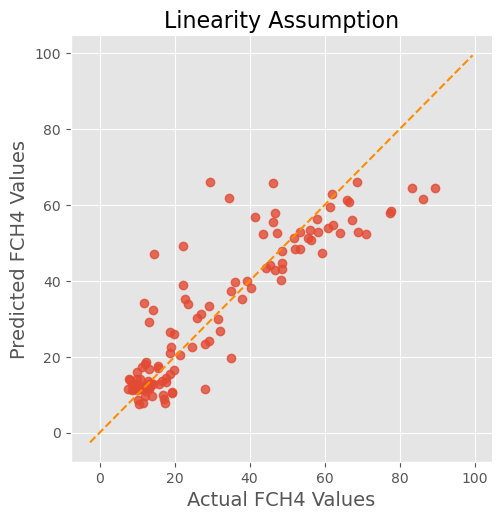

In [52]:
# plot the Linearity between the observed and predicted values

# Plotting the observed vs predicted values
sns.lmplot(x='FCH4', y='FCH4_pred', data=df, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df[['FCH4', 'FCH4_pred']].min().min()-10, 
                        df[['FCH4', 'FCH4_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted FCH4 Values', fontsize=14)
plt.xlabel('Actual FCH4 Values', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

In [53]:
# standardized residuals plotting

import statsmodels.api as sm

#define response variable
y = df['FCH4']

#define explanatory variable
x = df[['Soil_Temp', 'ATM_Temp', 'FCO2', 'Precip']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit() 

In [54]:
#create instance of influence
influence = model.get_influence()

#obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal

#display standardized residuals
print(standardized_residuals)

[ 0.1099622  -1.01898638  0.38637579  1.21361135  1.12532079 -0.93353612
 -0.41260611 -0.33498797 -0.40832263 -0.19959387 -0.37718644 -0.1177332
 -0.59797156 -1.76355234 -2.62310235 -1.09315696  0.54872218  0.42988407
 -0.35586246 -0.75142637 -0.37583225 -0.60290976 -0.40598681 -0.56420117
 -0.06460822 -1.21872112 -3.23079854 -3.6477232   0.55558235  0.54599683
  0.49980049  0.3086367   0.68932368  0.42799769  0.80605125  0.90120309
 -0.40261244  0.53507237 -1.9050737  -2.71296374  0.2686226   0.27093482
 -0.21963888 -0.03214625  0.2895209  -1.54531665  0.07898957  0.06761318
  1.6492623  -0.07423508  0.4601057   0.42704199 -1.57848708  1.94712353
  1.10563161  0.78955847  0.15707393  0.94788319  0.84460356  0.34848095
  0.658351    0.06069689 -0.55004957  0.2063208  -2.19119429  0.30993708
 -0.30310755 -0.24296321  0.14050111 -0.59848349 -1.63314627  0.34776927
  0.21477     2.4100484   1.57426772  0.10990741  0.15792954 -0.19507225
 -0.33910925 -0.59063709 -0.25162092  1.5002397  -0.

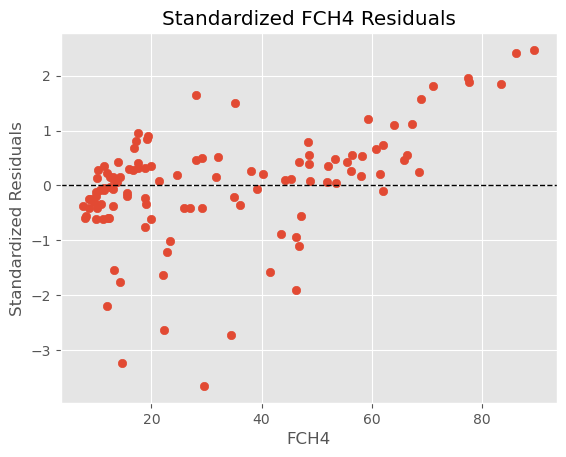

In [55]:
# create a scatterplot visualizing values for the predictor variable vs. the standardized residuals

import matplotlib.pyplot as plt

plt.scatter(df.FCH4, standardized_residuals)
plt.title('Standardized FCH4 Residuals')
plt.xlabel('FCH4')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

Standardized variables (either the predicted values or the residuals) have a mean of zero and standard deviation of one. If the residuals are normally distributed, 95% of them will fall between -2 and 2.

If they fall above or below 2 (in this case, four observations) they are considered unusual.

Almost entirely all observed residuals fall between -2 and 2 and can therefore be considered normally distributed.

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 6.90645354070575e-07


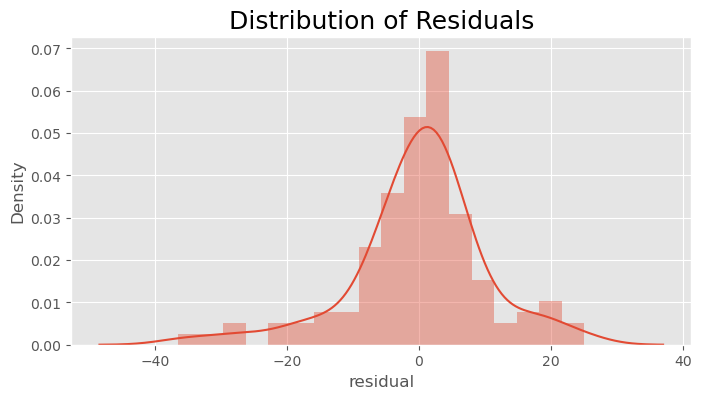

Residuals are not normally distributed


In [56]:
# Assess the Normality of our data.

# Normality: assumes error terms of model are normally distributed

# examine normality of residuals by plotting into histogram and looking at p-value from Anderson-Darling test for normality

# if p-value is higher than threshold (0.05) - assume residuals is normally distributed

from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(df['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

Discuss what to do if residuals are not normally distributed.

In [57]:
# Assess the autocorrelation of our model:

# Autocorrelation - correlation of errors (residuals) over time

from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.2466964078481961
Signs of positive autocorrelation 

Assumption not satisfied


Our Durbin-Watson analysis showed signs of positive autocorrelation - this means that the increaseed observed in a time interval will lead to a proportionate increase in the lagged time interval.

The outcome of a Durbin-Watson test ranges from 0 to 4. An outcome closely around 2 means a very low level of autocorrelation. An outcome closer to 0 suggests a stronger positive autocorrelation, and an outcome closer to 4 suggests a stronger negative autocorrelation.

Our Durbin-Watson result returned a value of 1.2.

This is concerning because we are interested in analyzing FCH4 Measurements through a historical context (a time-series analysis).

In [58]:
# Assess heteroscedasticity of data by comparing Breusch-Pagan and White Tests

from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Incorporate same predictor variables of interest (Site Index, Age, NTA)

#fit regression model
fit = smf.ols('FCH4 ~ Soil_Temp+ATM_Temp+FCO2+Precip', data=df).fit()

#view model summary
print(fit.summary())

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)






                            OLS Regression Results                            
Dep. Variable:                   FCH4   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     95.67
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           9.58e-35
Time:                        10:16:40   Log-Likelihood:                -426.35
No. Observations:                 114   AIC:                             862.7
Df Residuals:                     109   BIC:                             876.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -47.0870      6.202     -7.592      0.0

[('Lagrange multiplier statistic', 27.837695024210156),
 ('p-value', 1.345416055495192e-05),
 ('f-value', 8.80404939982599),
 ('f p-value', 3.3811865312489738e-06)]

The Bresuch-Pagan test returned a p-value greater than 0.05 (1.3). This means heteroscedasticity is present in our model.

In [65]:
# Perform a time-series forecast analysis using Supervised Machine Learning

# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lightgbm import LGBMRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import t
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import mean_absolute_error

In [66]:
# Import dataset - All monthly variables (2009 - 2019)

df = pd.read_csv(r'C:\Users\mattd\OneDrive\Desktop\All Variables 2009_2019 Date-Month.csv')

df.head()

,datetime,ATM Temperature,Precipitation,Soil Temperature,FCH4,FCO2
0,2009-04,39.8300,0.1250,33.3362,13.4700,-0.5221
1,2009-05,48.4070,0.2650,45.9725,23.4400,-1.4441
2,2009-06,58.5770,0.1750,52.0175,48.6300,-2.2784
3,2009-07,60.6020,0.2600,54.9024,59.3000,-3.7182
4,2009-08,61.2950,0.3250,59.4050,67.3100,-3.5193


In [67]:
# inspect all variables csv

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          129 non-null    object 
 1   ATM Temperature   129 non-null    float64
 2   Precipitation     129 non-null    float64
 3   Soil Temperature  129 non-null    float64
 4   FCH4              114 non-null    float64
 5   FCO2              129 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.2+ KB


In [68]:
# Look for seasonalities and Trends (w/ Null Values)

def decompose_FCH4_emissions(df, share_type='FCH4', samples=250, period=24):
    if samples == 'all':
        #decomposing all time series timestamps
        res = seasonal_decompose(df[share_type].values, period=period)
    else:
        #decomposing a sample of the time series
        res = seasonal_decompose(df[share_type].values[-samples:], period=period)
    
    observed = res.observed
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid
    
    #plot the complete time series
    fig, axs = plt.subplots(4, figsize=(16,8))
    axs[0].set_title('OBSERVED', fontsize=16)
    axs[0].plot(observed)
    axs[0].grid()
    
    #plot the trend of the time series
    axs[1].set_title('TREND', fontsize=16)
    axs[1].plot(trend)
    axs[1].grid()
    
    #plot the seasonality of the time series. Period=24 daily seasonality | Period=24*7 weekly seasonality.
    axs[2].set_title('SEASONALITY', fontsize=16)
    axs[2].plot(seasonal)
    axs[2].grid()
    
    #plot the noise of the time series
    axs[3].set_title('NOISE', fontsize=16)
    axs[3].plot(residual)
    axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
    axs[3].grid()

    plt.show()

In [69]:
# Drop Null Values
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [70]:
df_null = df.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

datetime           0.0000
ATM Temperature    0.0000
Precipitation      0.0000
Soil Temperature   0.0000
FCH4               0.0000
dtype: float64

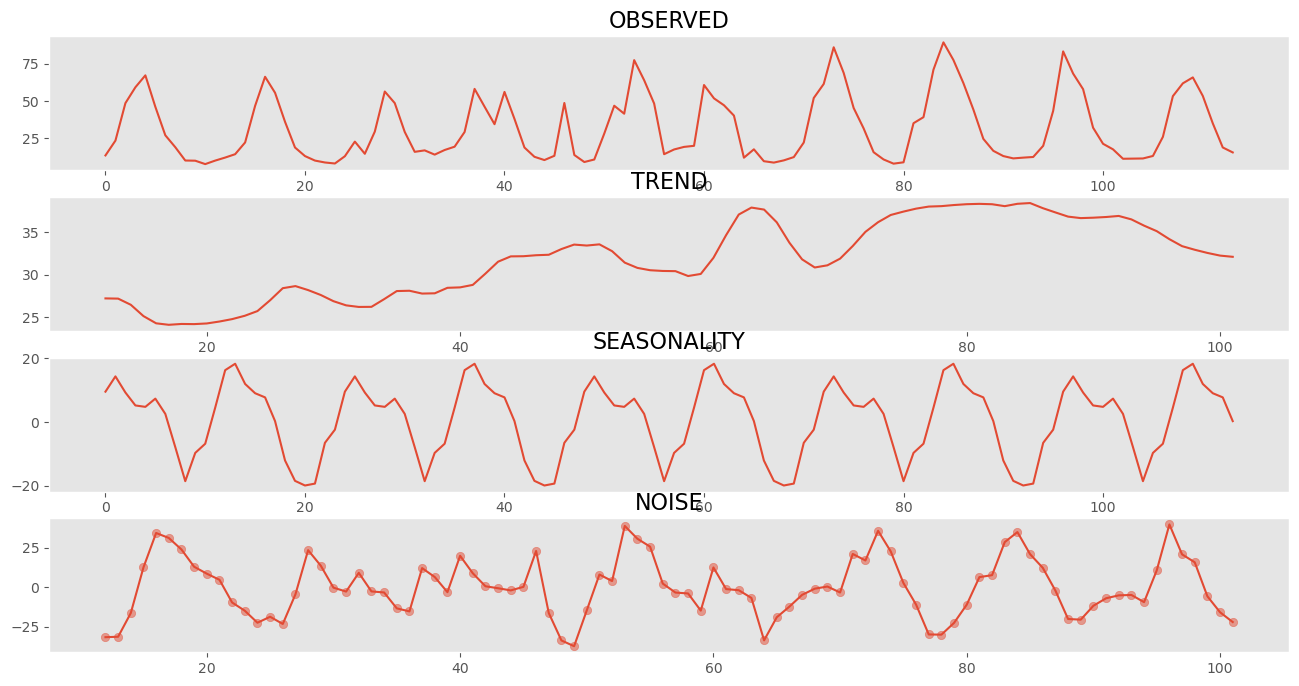

In [71]:
# decompose 1000 hours of time series with daily seasonlity (period=24)

decompose_FCH4_emissions(df, samples=1000, period=24)

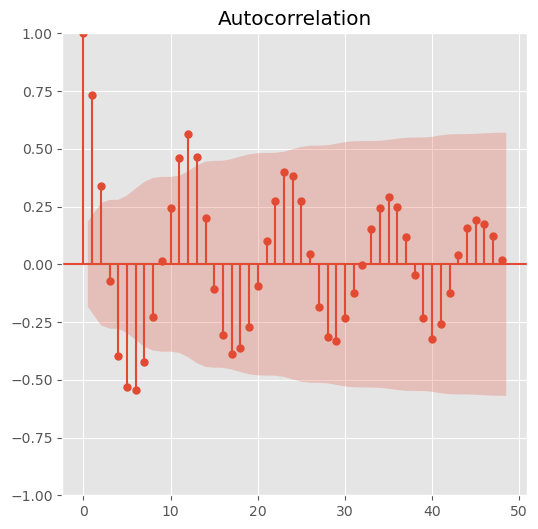

In [72]:
# Plot autocorrelation graph with 2-day lag

plot_acf(df['FCH4'].values, lags=48)
plt.show()

In [73]:
# Ex: Forecast 1 week FCH4 emissions (Machine Learning)

# 1 week = 7 days = 168 hours

# Microsoft Light Gradient Boosting Machine model

#convert datetime from object to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])
#set datetime as index
df = df.set_index(df.datetime)

#drop datetime column
df.drop('datetime', axis=1, inplace=True)

#create hour, day and month variables from datetime index
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month

In [74]:
df.head()

,ATM Temperature,Precipitation,Soil Temperature,FCH4,FCO2,hour,day,month
datetime,,,,,,,,
2009-04-01,39.8300,0.1250,33.3362,13.4700,-0.5221,0,1,4
2009-05-01,48.4070,0.2650,45.9725,23.4400,-1.4441,0,1,5
2009-06-01,58.5770,0.1750,52.0175,48.6300,-2.2784,0,1,6
2009-07-01,60.6020,0.2600,54.9024,59.3000,-3.7182,0,1,7
2009-08-01,61.2950,0.3250,59.4050,67.3100,-3.5193,0,1,8


In [75]:
def train_time_series_with_folds(df, horizon=12*3):
    X = df.drop('FCH4', axis=1)
    y = df['FCH4']
    
    #take last week of the dataset for validation
    X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
    y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]
    
    #create, train and do inference of the model
    model = LGBMRegressor(random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    #calculate MAE
    mae = np.round(mean_absolute_error(y_test, predictions), 3)    
    
    #plot reality vs prediction for the last week of the dataset
    fig = plt.figure(figsize=(16,6))
    plt.title(f'Real vs Prediction - MAE {mae}', fontsize=20)
    plt.plot(y_test, color='red')
    plt.plot(pd.Series(predictions, index=y_test.index), color='green')
    plt.xlabel('Month', fontsize=16)
    plt.ylabel('AVG FCH4 Emissions', fontsize=16)
    plt.legend(labels=['Real', 'Prediction'], fontsize=16)
    plt.grid()
    plt.show()

    #create a dataframe with the variable importances of the model
    df_importances = pd.DataFrame({
        'feature': model.feature_name_,
        'importance': model.feature_importances_
    }).sort_values(by='importance', ascending=False)
    
    #plot variable importances of the model
    plt.title('Variable Importances', fontsize=16)
    sns.barplot(x=df_importances.importance, y=df_importances.feature, orient='h')
    plt.show()

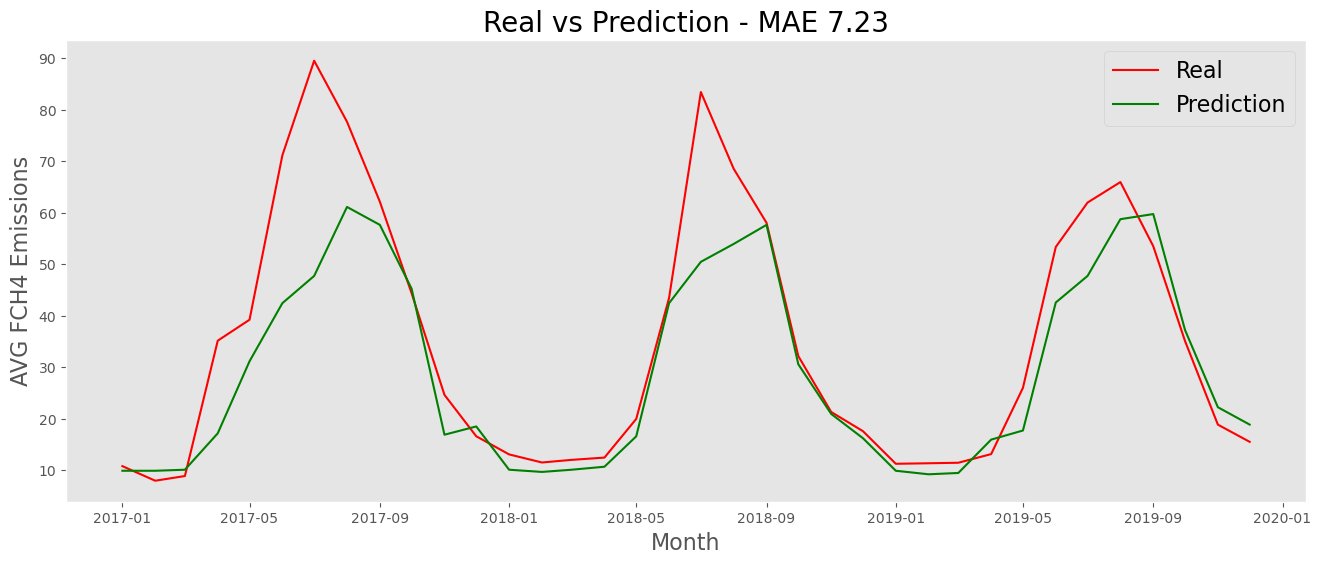

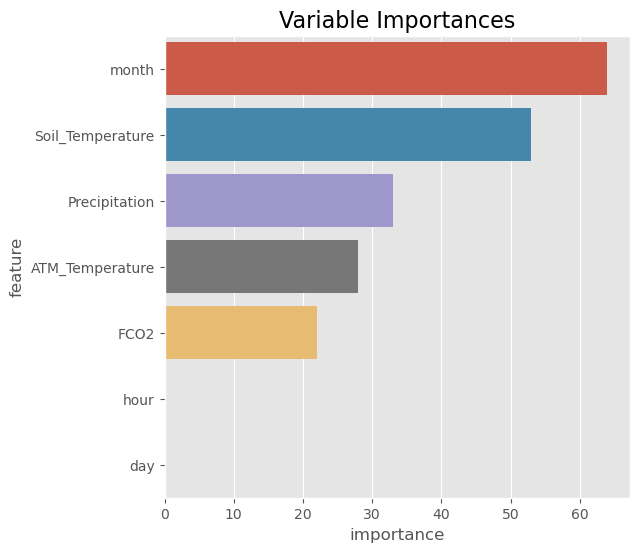

In [76]:
# Trained Model without Lags

train_time_series_with_folds(df)

In [77]:
# Data is autocorrelated - so add lags!

#create 1 Year lag variable by shifting the target value for 1 Year
df['count_prev_year_same_month'] = df['FCH4'].shift(12*1)

#drop NaNs after feature engineering
df.dropna(how='any', axis=0, inplace=True)

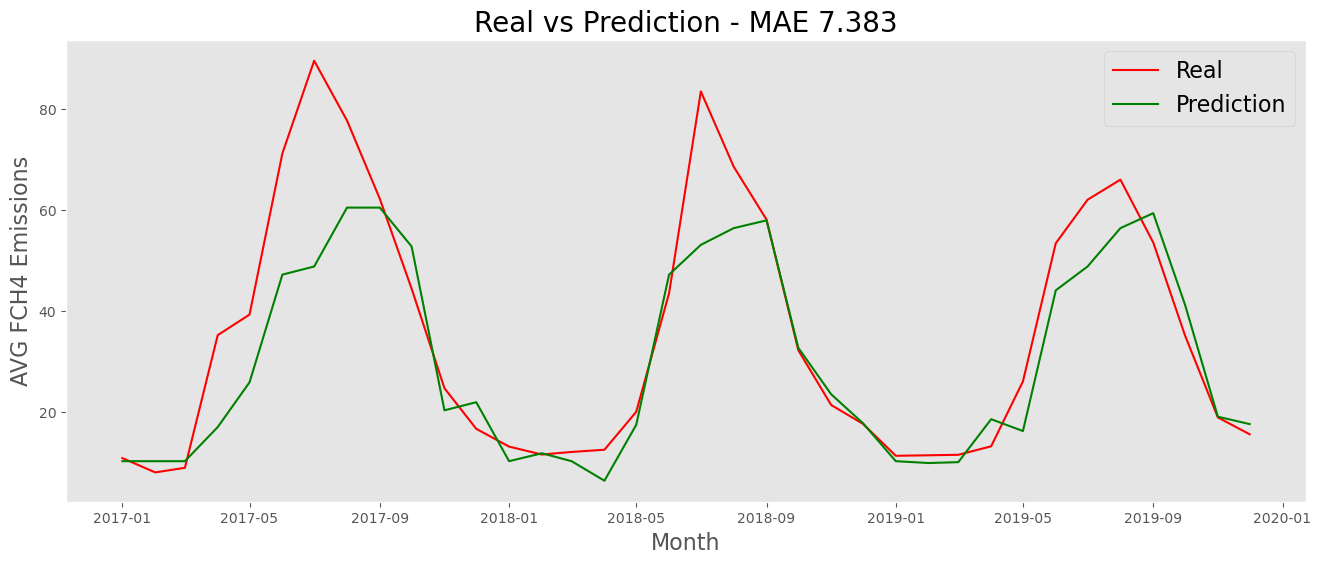

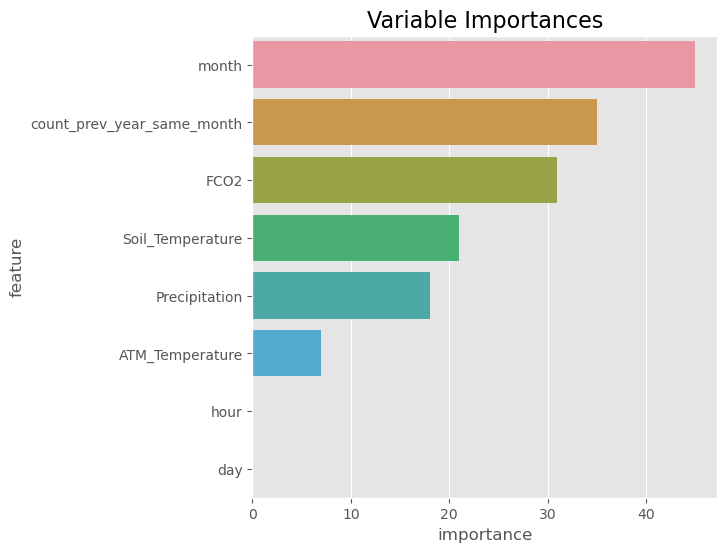

In [78]:
train_time_series_with_folds(df)